┌ Warning: attempting to remove probably stale pidfile
│   path = /home/puripat/.jlassetregistry.lock
└ @ Pidfile /home/puripat/.julia/packages/Pidfile/DDu3M/src/Pidfile.jl:260


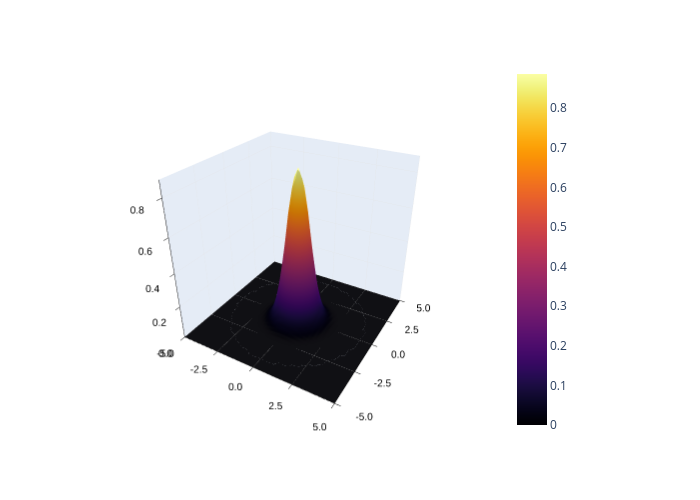

In [1]:
using Plots; plotlyjs()
using LinearAlgebra
using BenchmarkTools

freePropagator(finPos, startPos, finTime, startTime = 0, m = 1) = sqrt(m / (2 * pi * im * (finTime - startTime))) * exp(im * m / (2 * (finTime - startTime)) * (finPos - startPos)^2)  
freePropagatorC(qf, qfp, q0, q0p, tf, t0) = freePropagator(qf, q0, tf, t0) + freePropagator(qfp, q0p, tf, t0)
initStateFunction(q0, q0p, σ1, s1, p1, σ2, s2, p2) = (1//2 * pi * σ1)^(1//4) * exp(-(q0 - s1)^2 / (4 * σ1^2) + im * p1 * q0) * (1//2 * pi * σ2)^(1//4) * exp(-(q0p - s2)^2 / (4 * σ2^2) + im * p2 * q0p)

maxPos = 5
minPos = -5
stepPos = 0.25

pos1Vect = collect(minPos:stepPos:maxPos)
pos2Vect = collect(minPos:stepPos:maxPos)
posVectSize = size(pos1Vect, 1)
posMat = [(i, j) for i in pos1Vect, j in pos2Vect]

posToIndex(pos) = Int32((pos - minPos) / stepPos  + 1)

initState(q) = initStateFunction(q[1], q[2], 0.5, 0, 0, 0.5, 0, 0)
initMat = initState.(posMat)
initMat = round.(initMat, digits = 7)

α = 0.5
m = 1

surface(pos1Vect, pos2Vect, abs.(initMat))

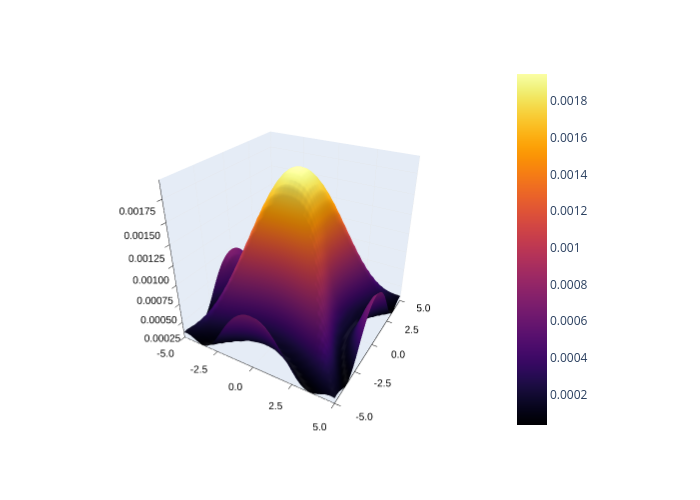

In [8]:
finalMat = Matrix{ComplexF32}(undef, posVectSize, posVectSize)

anim = @animate for finalTime in collect(0:0.1:3)
    for xf in pos1Vect, xfp in pos2Vect
        sumPos = 0
        for i in 1:posVectSize, j in 1:posVectSize
            x0 = pos1Vect[i]
            x0p = pos2Vect[j]
            sumPos += freePropagatorC(xf, xfp, x0, x0p, finalTime, 0) * initMat[i, j]
        end
        finalMat[posToIndex(xf), posToIndex(xfp)] = sumPos
    end
    surface(pos1Vect, pos2Vect, abs2.(normalize(finalMat)))
end
gif(anim, "FreeAnim.gif", fps = 15)